<a href="https://colab.research.google.com/github/ShrikantUppin/Neural_Network/blob/main/forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Netwrok:**
***

# **Category of Network: feedforward artificial neural network**
# **Type    : multilayer perceptron (MLP)**
***


# **Step 1: Importing required libraries**
***

In [45]:
# datastructure libraries of python...

import numpy as np
import pandas as pd

# libraries for visualization...

import seaborn as sns
import matplotlib.pyplot as plt

# basic metrics from sklearn modules..

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# model selection tools & hyperparameter tuner GridsearchCV from sklearn modules..

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# importing required packages/libraries/modules to build basic...

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

# ignoring warnings

import warnings
warnings.filterwarnings('ignore')

# **Step 2: Dataset Loading & Preprocessing..**
***

In [2]:
dataset = pd.read_csv('/content/forestfires.csv')
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [3]:
# checking shape of the data..
dataset.shape

(517, 31)

In [4]:
# checking null values from data..
dataset.isnull().sum().sum()  # this will gives sum  for all data

0

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
# Dropping unnecessary columns...
# Since month & day have already encoded so we don't required these columns..

dataset = dataset.drop(['month', 'day'], axis=1)
dataset.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


  ## **Dataset Categorical variables encoding..**

In [7]:
dataset['size_category'] = dataset['size_category'].map({'small':0, 'large':1})

  ## **EDA**

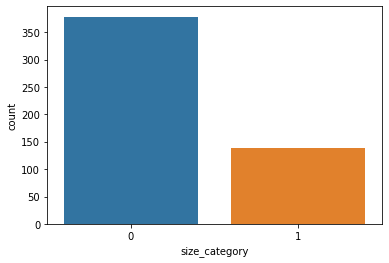

In [17]:
# checking counts for large & and small fire i.e for 1 & 0..

sns.countplot(dataset['size_category'])
plt.show()

## **Splitting dataset into depedent & indepedent variables...**

In [8]:
X = dataset.drop(['size_category'], axis=1)

In [9]:
y = dataset['size_category']

## **Transformation MinMaxScalar...**

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# **Step 3: Splitting data into train & test data...**
***

Note: this can be done using kears during model run or building..

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.2, random_state=42 )

In [12]:
((X_train.shape, y_train.shape),(X_test.shape, y_test.shape))

(((413, 28), (413,)), ((104, 28), (104,)))

# **Step 4: Building a MLP Model**
***

## Things Must know about Keras before you write a code......
***

Visit: https://keras.io/api/



## **4.1 Sequential Model**
***

In [131]:
 
model = Sequential([
                    keras.Input(shape=(28,)),
                    layers.Dense(8),
                    layers.Dense(8),
                    layers.Dense(4),
                    layers.Dense(1)
])

In [132]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 232       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


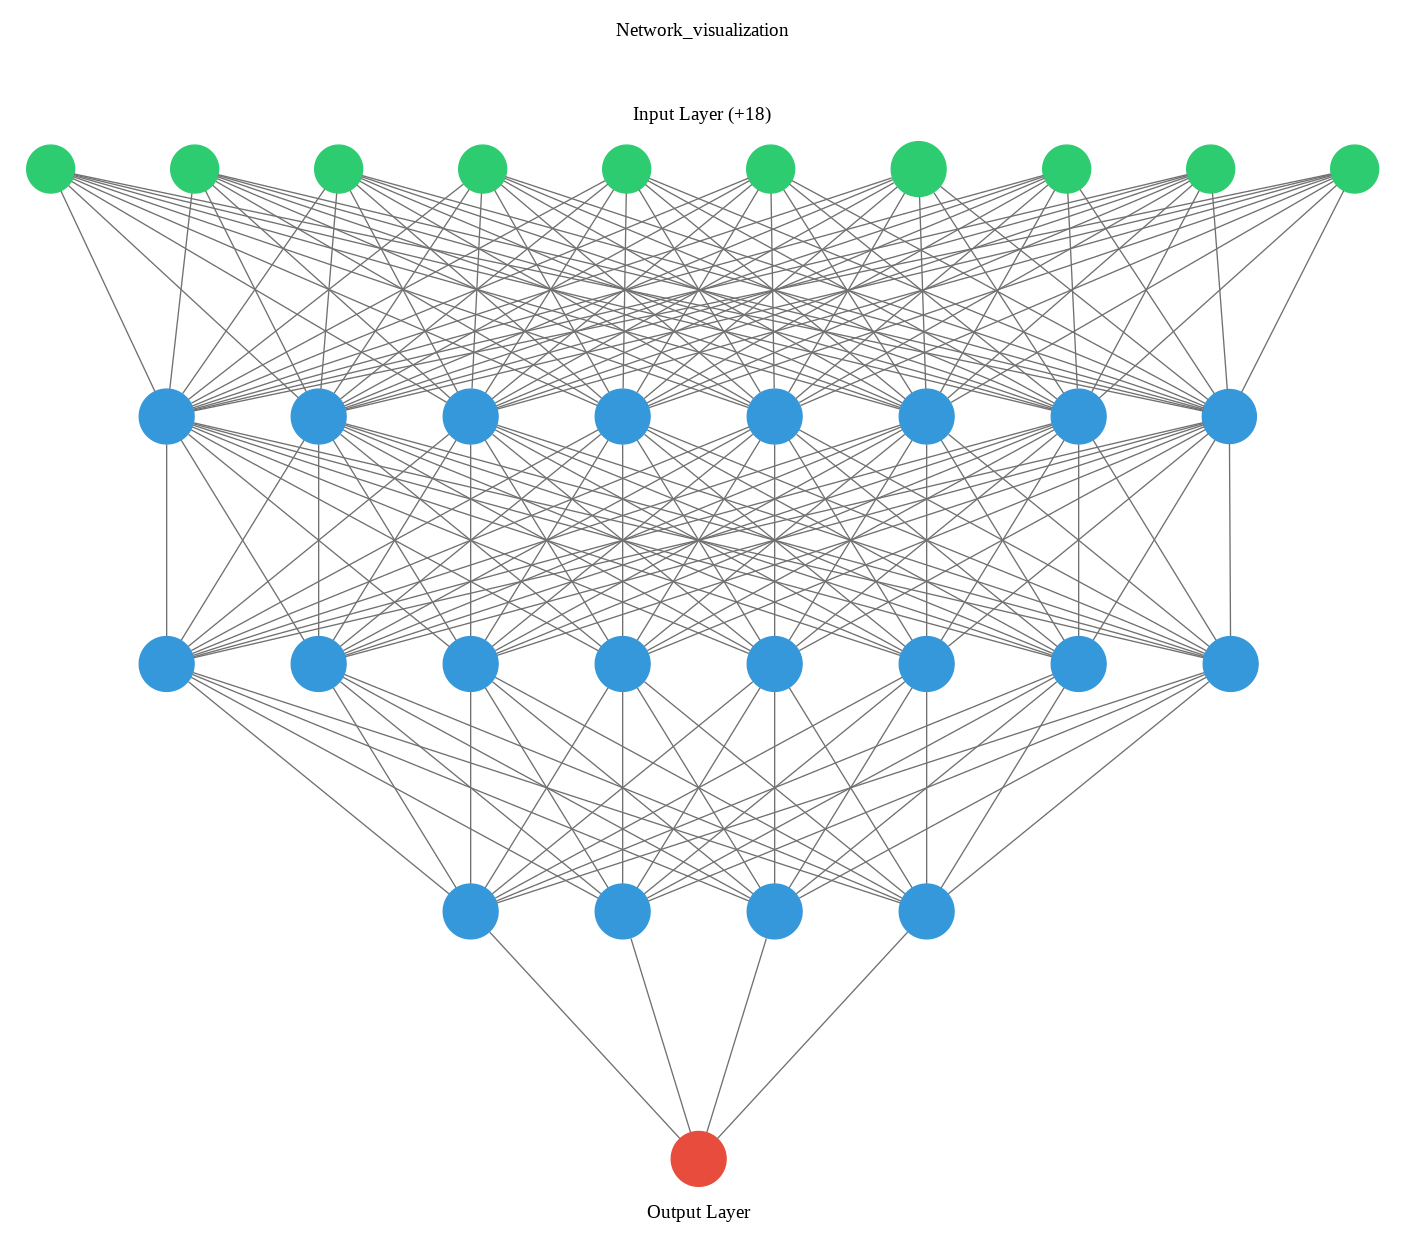

In [133]:
from ann_visualizer.visualize import ann_viz
from graphviz import render
from IPython.display import Image

ann_viz(model, title='Network_visualization')
render('dot', 'png', '/content/network.gv') 
Image(filename='/content/network.gv.png', width=600)